# K Means Clustering Algorithms Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [3]:
X,y = make_blobs(n_samples=1000 , centers=3 , n_features=2 , random_state=23)

In [4]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [5]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

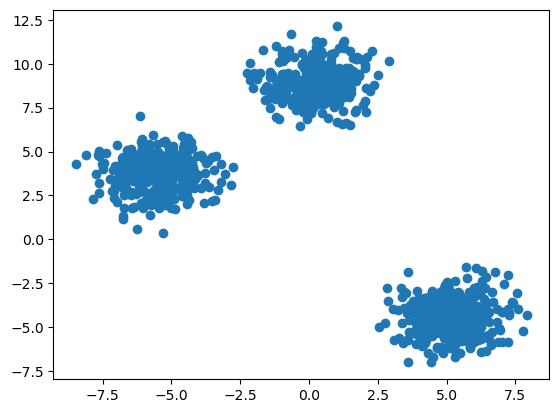

In [22]:
plt.scatter(X[:,0],X[:,1])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.cluster import KMeans

In [34]:
# Elbow method to select K value
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init="k-means++")
    kmeans.fit(X_train)
    ss.append(kmeans.inertia_)

In [35]:
ss

[7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 991.8238694516631,
 854.2929980760777,
 754.7452746937047,
 670.4366130676663,
 579.6042926117674,
 533.0298517796659]

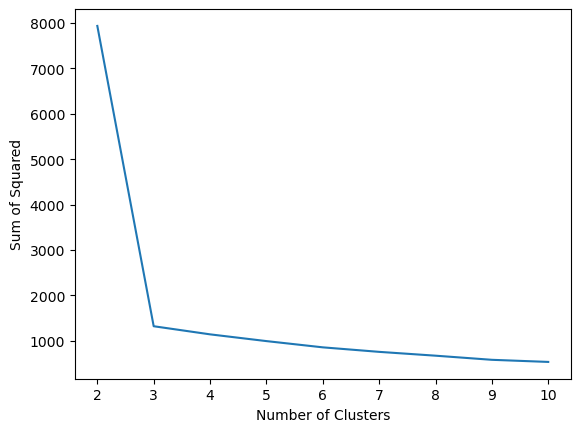

In [36]:
##plot elbow curve
plt.plot(range(2,11),ss)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3 , init="k-means++")

In [38]:
y_labels = kmeans.fit_predict(X_train)

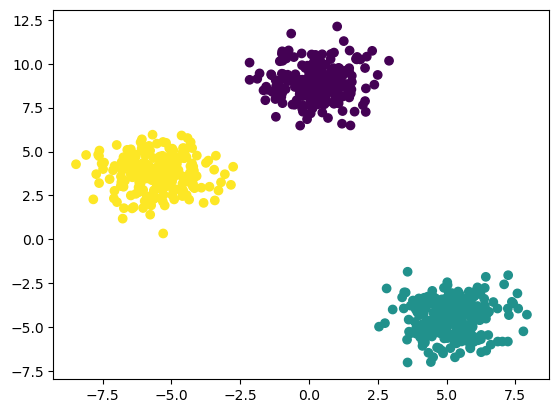

In [39]:
plt.scatter(X_train[:,0], X_train[:,1] , c=y_labels)

In [40]:
#knee locator
!pip install kneed

In [41]:
from kneed import KneeLocator

In [42]:
k1 = KneeLocator(range(2,11), ss , curve='convex', direction='decreasing')
k1.elbow

3

In [43]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [44]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [45]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.3363323500678605,
 0.3469764348559897,
 0.34517484497260104,
 0.34332505786720624,
 0.3422417865964022]

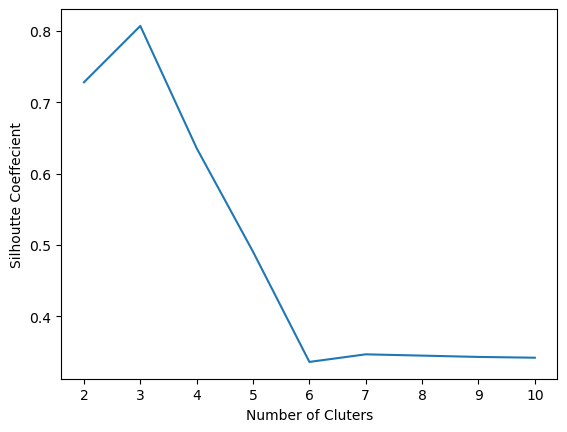

In [46]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [47]:
# Getting the cluster centroids
centroids = kmeans.cluster_centers_
centroids

array([[ 4.6502535 , -3.6372806 ],
       [-0.70273743,  8.74667253],
       [-4.40822399,  4.17414366],
       [ 0.61292948,  9.98281689],
       [-6.31590254,  4.3153354 ],
       [ 0.72925717,  8.13978616],
       [ 4.36067187, -5.39138689],
       [ 6.24363199, -3.80368937],
       [ 5.85660762, -5.57369798],
       [-5.66115632,  2.68084554]])